In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('co2_emission.csv')

In [6]:
df.tail()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88
20852,Zimbabwe,ZWE,2017,10397718.47


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          20853 non-null  object 
 1   Code                            18646 non-null  object 
 2   Year                            20853 non-null  int64  
 3   Annual CO₂ emissions (tonnes )  20853 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 651.8+ KB


In [9]:
df.describe()

,Year,Annual CO₂ emissions (tonnes )
count,20853.000000,2.085300e+04
mean,1953.339424,1.930517e+08
std,57.903089,1.345143e+09
min,1751.000000,-6.255223e+08
25%,1932.000000,3.187680e+05
50%,1971.000000,3.828880e+06
75%,1995.000000,3.706898e+07
max,2017.000000,3.615326e+10


In [10]:
df['Entity'].value_counts()

Middle East                  267
Africa                       267
International transport      267
Americas (other)             267
Statistical differences      267
                            ... 
Antarctic Fisheries           21
Wallis and Futuna Islands     17
Timor                         16
Christmas Island              14
Liechtenstein                 11
Name: Entity, Length: 233, dtype: int64

In [11]:
df[df['Code'].isnull()]['Entity'].value_counts()

Europe (other)               267
Americas (other)             267
Asia and Pacific (other)     267
Africa                       267
Statistical differences      267
Middle East                  267
International transport      267
EU-28                        267
Kyrgysztan                    33
Antarctic Fisheries           21
Wallis and Futuna Islands     17
Name: Entity, dtype: int64

In [13]:
macro_areas = 'Africa,Europe (other),EU-28,Americas (other),Asia and Pacific (other),Middle East,International transport,Statistical differences,World'.split(',')

In [14]:
df.columns = ['Entity', 'Code', 'Year', 'Annual CO2 emissions (tonnes)']

In [15]:
df_emissions_countries = df[df['Entity'].isin(macro_areas) == False]

In [16]:
df_emissions_areas = df[df['Entity'].isin(macro_areas[:7])]


<AxesSubplot:xlabel='Year'>

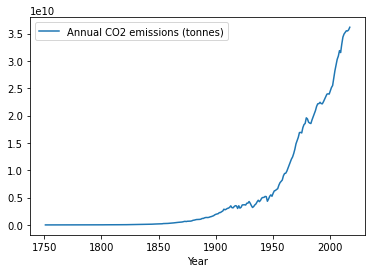

In [17]:
df[df['Entity'] == 'World'].plot.line(x='Year')

Text(0.5, 1.0, 'Macro-region emissions')

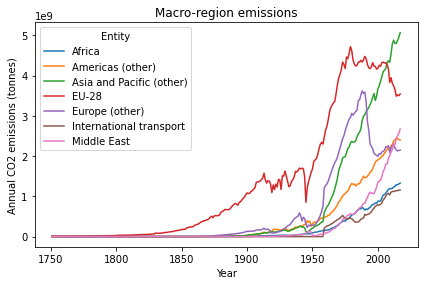

In [18]:
sns.lineplot(x='Year', y='Annual CO2 emissions (tonnes)', hue='Entity', data=df_emissions_areas)
plt.tight_layout()
plt.title('Macro-region emissions')

In [19]:
df_Europe1950 = df_emissions_areas[
    (df_emissions_areas['Entity'].isin('EU-28,Europe (other)'.split(',')))
    & (df_emissions_areas['Year'] > 1950)]

Text(0.5, 1.0, 'EU Emissions from 1950')

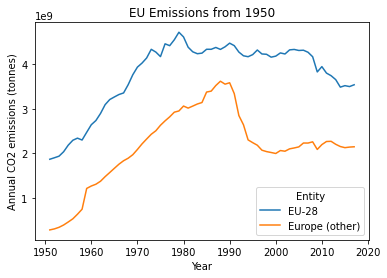

In [20]:
sns.lineplot(x='Year', y='Annual CO2 emissions (tonnes)', hue='Entity', data=df_Europe1950)
plt.title('EU Emissions from 1950')

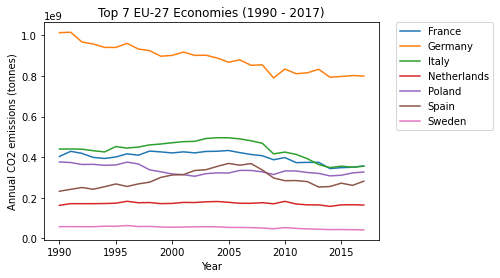

<Figure size 720x576 with 0 Axes>

In [21]:
df_EU27_7 = df_emissions_countries[
    (df_emissions_countries['Entity'].isin('Italy Netherlands Poland France Germany Spain Sweden'.split(' ')))
    & (df_emissions_countries['Year'] > 1989)]

sns.lineplot(x='Year', y='Annual CO2 emissions (tonnes)', hue='Entity', data=df_EU27_7)
plt.title('Top 7 EU-27 Economies (1990 - 2017)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(10,8))
plt.tight_layout()

In [22]:
def EmissionsReduction(listOfCountries, frame):
    for i in listOfCountries:
        E = df_EU27_7[(df_EU27_7['Entity'] == i) & (df_EU27_7['Year'] == 2017)]['Annual CO2 emissions (tonnes)'].iloc[0]
        e = df_EU27_7[(df_EU27_7['Entity'] == i) & (df_EU27_7['Year'] == 1990)]['Annual CO2 emissions (tonnes)'].iloc[0]
        frame[i] = (E - e)/e

In [23]:
frame = {}
EmissionsReduction('Italy Netherlands Poland France Germany Spain Sweden'.split(' '), frame)
frame

{'Italy': -0.19204696481376812,
 'Netherlands': 0.009881193285805136,
 'Poland': -0.13146030382159143,
 'France': -0.11610238326697225,
 'Germany': -0.21080878266138905,
 'Spain': 0.21357480050445105,
 'Sweden': -0.2783139553856956}

In [24]:
largestEconomies = ['China', 'United States', 'India', 'Japan', 'Germany', 'Russia', 'Indonesia', 'Brazil', 'United Kingdom', 'France']

In [25]:
df_emissions_topEconomies = df[
    (df['Entity'].isin(largestEconomies))
    & (df['Year'] > 1900)]

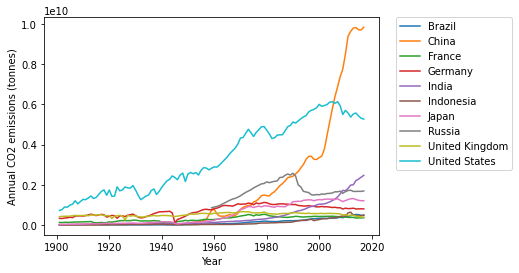

<Figure size 720x576 with 0 Axes>

In [26]:
sns.lineplot(x='Year', y='Annual CO2 emissions (tonnes)', hue='Entity', data=df_emissions_topEconomies)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(10,8))
plt.tight_layout()

Text(0.5, 1.0, 'Historical Total Emissions (from 1900)')

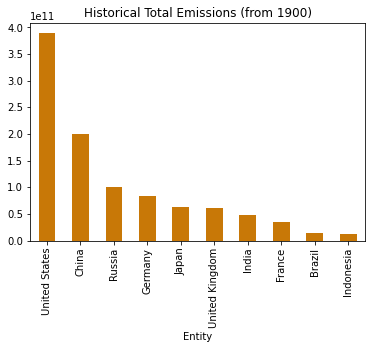

In [27]:
df_emissions_topEconomies.groupby('Entity').sum()['Annual CO2 emissions (tonnes)'].sort_values(ascending=False).plot.bar(color='#C87807')
plt.title('Historical Total Emissions (from 1900)')

In [28]:
def Emissions2017(entity):
    return df[(df['Entity'] == entity) & (df['Year'] == 2017)]['Annual CO2 emissions (tonnes)'].iloc[0]

gdp_population2017 = {
    1 : ['United States', 19485394000000, 325084756, 9525067, Emissions2017('United States')],
    2 : ['China', 12237700479375, 1421021791, 9596961, Emissions2017('China')],
    3 : ['Japan', 4872415104315, 127502725, 377975, Emissions2017('Japan')],
    4 : ['Russia', 1578417211937, 145530082, 17098246, Emissions2017('Russia')],
    5 : ['India',2650725335364, 1338676785, 3287263, Emissions2017('India')],
    6 : ['Germany', 3693204332230, 82658409, 357114, Emissions2017('Germany')]

}

In [29]:
df_gdp_population = pd.DataFrame.from_dict(gdp_population2017, orient='index', columns = ['Entity', 'GDP nominal 2017', 'Population', 'Total Area (km2)', 'CO2 Emissions 2017'])

In [30]:
df_gdp_population

,Entity,GDP nominal 2017,Population,Total Area (km2),CO2 Emissions 2017
1,United States,19485394000000,325084756,9525067,5.269530e+09
2,China,12237700479375,1421021791,9596961,9.838754e+09
3,Japan,4872415104315,127502725,377975,1.205061e+09
4,Russia,1578417211937,145530082,17098246,1.692795e+09
5,India,2650725335364,1338676785,3287263,2.466765e+09
6,Germany,3693204332230,82658409,357114,7.993732e+08


In [31]:
df_gdp_population['CO2 / GDP'] = df_gdp_population['CO2 Emissions 2017'] /df_gdp_population['GDP nominal 2017']
df_gdp_population['CO2 / Population'] = df_gdp_population['CO2 Emissions 2017'] /df_gdp_population['Population']
df_gdp_population['CO2 / Area'] = df_gdp_population['CO2 Emissions 2017'] /df_gdp_population['Total Area (km2)']

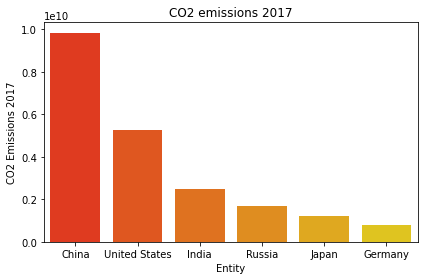

In [32]:
sns.barplot(x='Entity', y='CO2 Emissions 2017', data=df_gdp_population, palette='autumn', order=df_gdp_population.sort_values('CO2 Emissions 2017', ascending=False)['Entity'])
plt.title('CO2 emissions 2017')
plt.tight_layout()

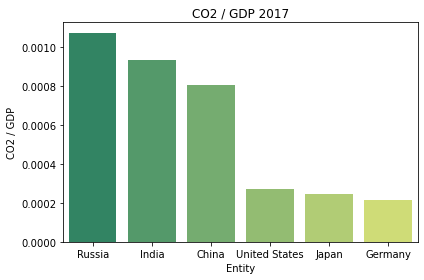

In [33]:
sns.barplot(x='Entity', y='CO2 / GDP', data=df_gdp_population, palette='summer', order=df_gdp_population.sort_values('CO2 / GDP', ascending=False)['Entity'])
plt.title('CO2 / GDP 2017')
plt.tight_layout()

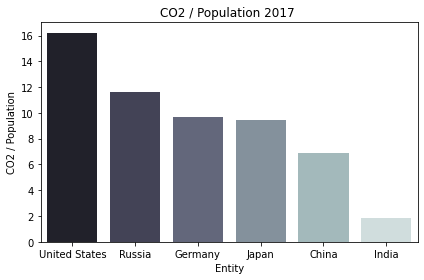

In [34]:
sns.barplot(x='Entity', y='CO2 / Population', data=df_gdp_population, palette='bone', order=df_gdp_population.sort_values('CO2 / Population', ascending=False)['Entity'])
plt.title('CO2 / Population 2017 ')
plt.tight_layout()

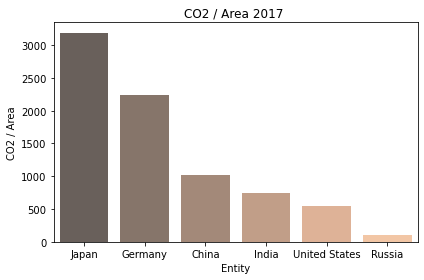

In [35]:
sns.barplot(x='Entity', y='CO2 / Area', data=df_gdp_population, palette='copper', order=df_gdp_population.sort_values('CO2 / Area', ascending=False)['Entity'], alpha=.7)
plt.title('CO2 / Area 2017 ')
plt.tight_layout()

In [36]:
G = df_gdp_population['GDP nominal 2017']
P = df_gdp_population['Population']
A = df_gdp_population['Total Area (km2)']
CO2= df_gdp_population['CO2 Emissions 2017']
df_gdp_population['Absolute value'] = CO2 / (G+P+A)


In [37]:
df_gdp_population

,Entity,GDP nominal 2017,Population,Total Area (km2),CO2 Emissions 2017,CO2 / GDP,CO2 / Population,CO2 / Area,Absolute value
1,United States,19485394000000,325084756,9525067,5.269530e+09,0.000270,16.209710,553.227553,0.000270
2,China,12237700479375,1421021791,9596961,9.838754e+09,0.000804,6.923718,1025.194749,0.000804
3,Japan,4872415104315,127502725,377975,1.205061e+09,0.000247,9.451258,3188.203394,0.000247
4,Russia,1578417211937,145530082,17098246,1.692795e+09,0.001072,11.631924,99.004005,0.001072
5,India,2650725335364,1338676785,3287263,2.466765e+09,0.000931,1.842689,750.400979,0.000930
6,Germany,3693204332230,82658409,357114,7.993732e+08,0.000216,9.670803,2238.425855,0.000216


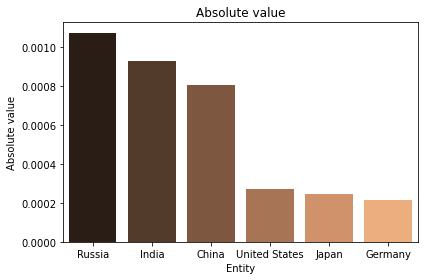

In [38]:
sns.barplot(x='Entity', y='Absolute value', data=df_gdp_population, palette='copper', order=df_gdp_population.sort_values('Absolute value', ascending=False)['Entity'])
plt.title('Absolute value')
plt.tight_layout()